# IRIS Classification

### importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df=df.drop("Id",axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### EDA

In [6]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [8]:
df.drop_duplicates(inplace=True)
df.shape

(147, 5)

<Axes: xlabel='Species', ylabel='count'>

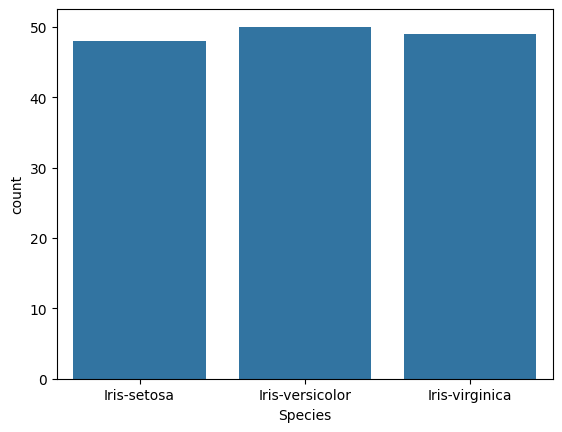

In [9]:
sns.countplot(x="Species",data=df)

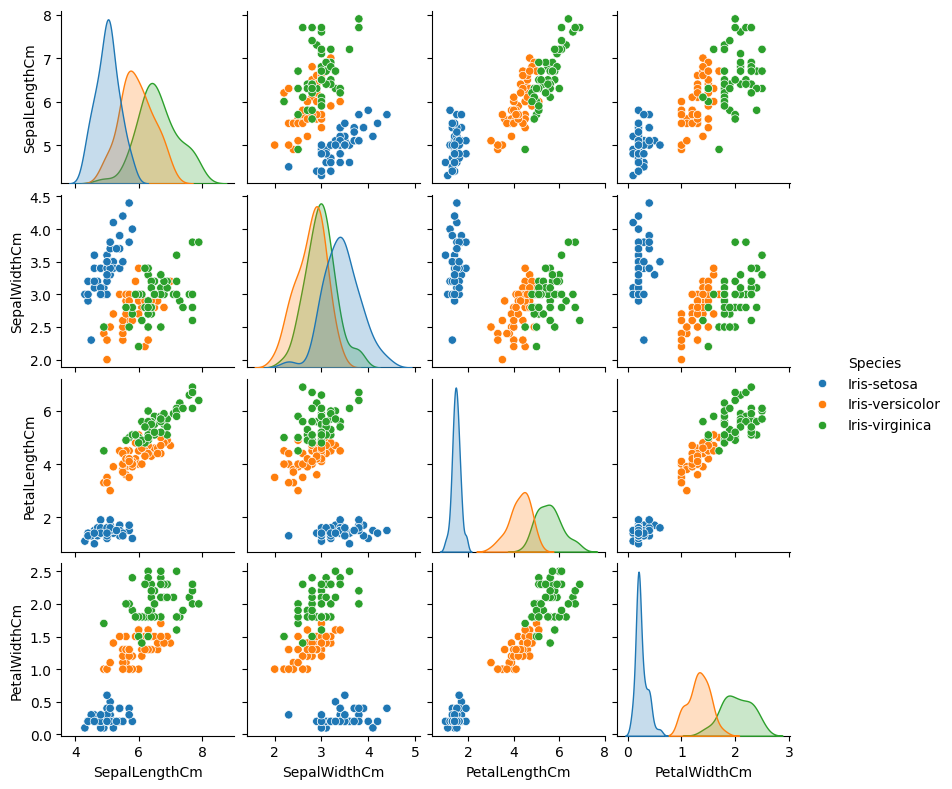

In [10]:
sns.pairplot(df, hue='Species', height=2)


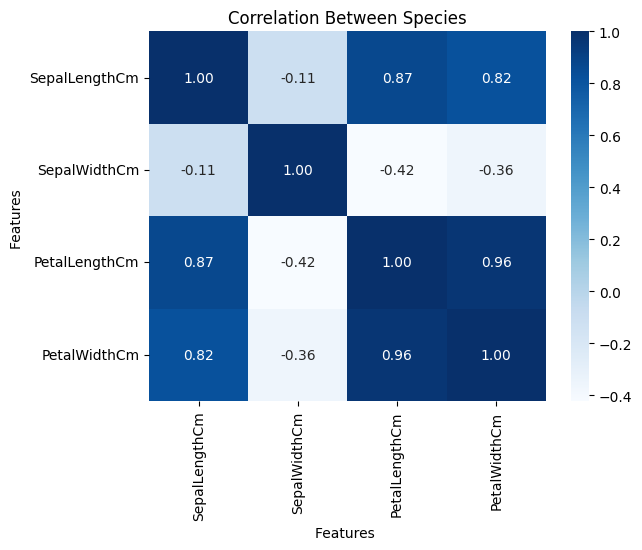

In [11]:
corr=df.select_dtypes(np.float64).corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Between Species")
plt.xlabel("Features ")
plt.ylabel("Features ")
plt.show();


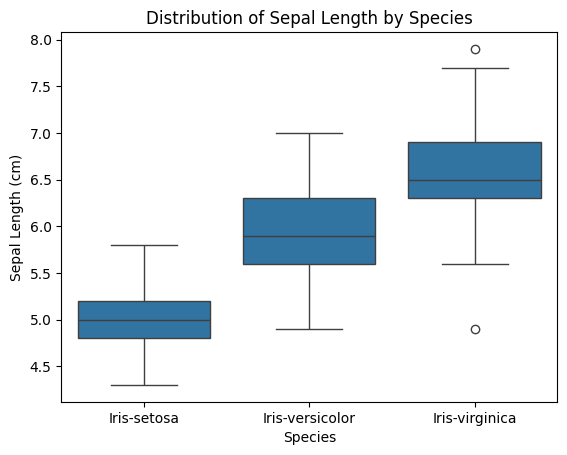

In [12]:
# Box plots
sns.boxplot(data=df, x="Species", y="SepalLengthCm")
plt.title("Distribution of Sepal Length by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length (cm)")
plt.show()

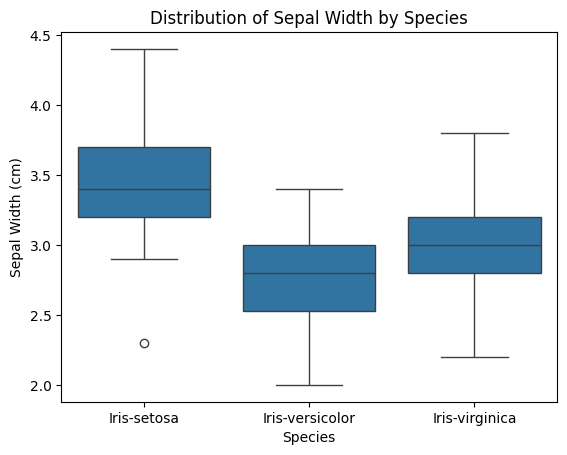

In [13]:

sns.boxplot(data=df, x="Species", y="SepalWidthCm")
plt.title("Distribution of Sepal Width by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Width (cm)")
plt.show()

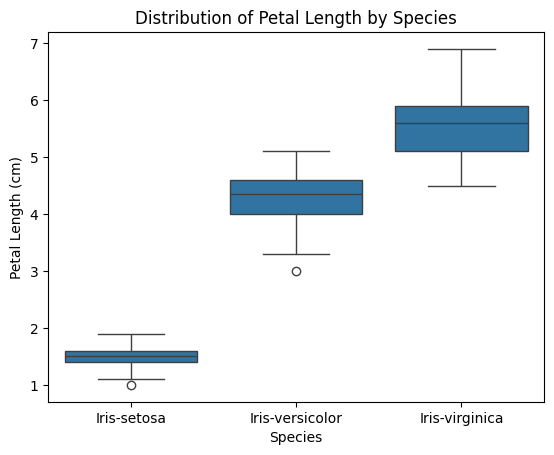

In [14]:

sns.boxplot(data=df, x="Species", y="PetalLengthCm")
plt.title("Distribution of Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.show()

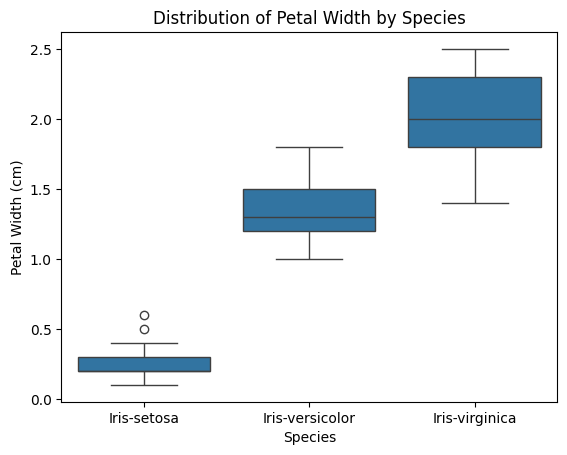

In [15]:

sns.boxplot(data=df, x="Species", y="PetalWidthCm")
plt.title("Distribution of Petal Width by Species")
plt.xlabel("Species")
plt.ylabel("Petal Width (cm)")
plt.show()

### Training Model

In [16]:
X=df.drop("Species",axis=1)
y=df["Species"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Score: 0.9666666666666667
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



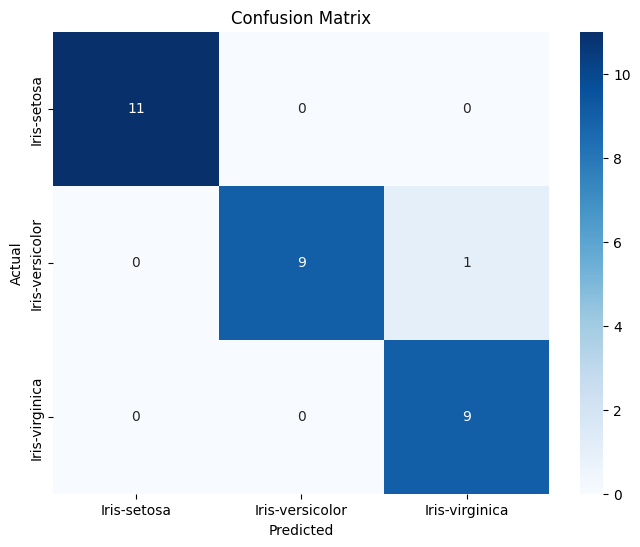

In [18]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train_scaled,y_train)
logic_pred=model.predict(X_test_scaled)
conf_mat=confusion_matrix(y_test,logic_pred)

print("Score:", model.score(X_test_scaled,y_test))
print("Classification Report:\n", classification_report(y_test,logic_pred))
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data=conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
list(df.sample(1).values)

[array([5.2, 3.5, 1.5, 0.2, 'Iris-setosa'], dtype=object)]

## Saving the model for later use

In [20]:
import joblib
joblib.dump(model, 'trained_model.joblib')
joblib.dump(scaler, 'trained_scaler.joblib')


['trained_scaler.joblib']

## Using the Model

In [21]:
import gradio as gr


loaded_model = joblib.load('trained_model.joblib')
loaded_scaler = joblib.load('trained_scaler.joblib')

def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    input_data_scaled = loaded_scaler.transform(input_data)

    prediction = loaded_model.predict(input_data_scaled)[0]

    return prediction.replace("-", " ").capitalize()

demo = gr.Interface(
    fn=predict_species,
    inputs=[
        gr.Number(label="Sepal Length",step=0.1),
        gr.Number(label="Sepal Width",step=0.1),
        gr.Number(label="Petal Length", step=0.1),
        gr.Number(label="Petal Width",step=0.1)],
    outputs=gr.Textbox(label="Predicted Flower Name"),
    title="Iris Classification",
    description="Machine learning model to classify the iris species using the parameters",
    examples=[
        [5.1, 3.7, 1.5, 0.4],
        [6.2, 2.8, 4.8, 1.8],
        [6.1, 2.9, 4.7, 1.4]
    ],
    
)

try :   
    demo.launch(share=True)
except Exception as e:
    print(e)


c:\Anaconda3\envs\my_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on local URL:  http://127.0.0.1:7860

Could not create share link. Missing file: c:\Anaconda3\envs\my_env\lib\site-packages\gradio\frpc_windows_amd64_v0.2. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.2/frpc_windows_amd64.exe
2. Rename the downloaded file to: frpc_windows_amd64_v0.2
3. Move the file to this location: c:\Anaconda3\envs\my_env\lib\site-packages\gradio


c:\Anaconda3\envs\my_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
